Importing libraries

In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np

Importing classes

In [2]:
#CMAB
from Strategies.CLinUCB import CLinUCB
from Strategies.CLUB import CLUB
from Strategies.LinUCB                    import LinUCB
from Strategies.LinUCBGlobal              import LinUCBGlobal
#Rewards
from Strategies.Rewards.BernoulliFeature   import BernoulliFeature

Init Parameters

In [3]:
iterations = 5000
experimentos = 1
k = 10
d = 2
alpha = 1
user_amount = 100
max_prob = 0.3
noise = 0.1
cluster_amount = 2
clusters_amounts = [1,2,4,8,16]
gree = math.radians(25)
aux = [math.cos(gree), math.sin(gree)]
aux /= np.linalg.norm(aux)
aux2 = [math.cos(-gree), math.sin(-gree)]
aux2 /= np.linalg.norm(aux2)
best_theta = [[0, 1],[0,-1]]
lamb = 1

sup_percentile = 75
inf_percentile = 25

Init

In [4]:
reward_class = BernoulliFeature(k, d,user_amount,cluster_amount, max_prob, noise, best_theta)

In [5]:
# Run experiments
linucb_regrets              = np.zeros((experimentos,iterations))
linucb_g_regrets              = np.zeros((experimentos,iterations))
linucb_cluster_regrets       = np.zeros((experimentos,iterations))
club_regrets       = np.zeros((experimentos,iterations))
# Run experiments
for i in    range(experimentos):
    print('exp: ' + str(i + 1) + '/' + str(experimentos))

    #club      = CLUB(k, iterations, reward_class, d, user_amount, alpha)
    linucb       = LinUCB(k, iterations, reward_class, d, user_amount, alpha, lamb )
    linucbg      = LinUCBGlobal(k, iterations, reward_class, d, user_amount, alpha, lamb )
    linucbk      = CLinUCB(k, iterations, reward_class, d, user_amount, alpha, clusters_amounts, lamb, 500, 100 )

    #club_regrets[i]           = club.run()
    linucb_cluster_regrets[i]           = linucbk.run()
    linucb_regrets[i]                   = linucb.run()
    linucb_g_regrets[i]                 = linucbg.run()


exp: 1/1
0/5000
1000/5000
2000/5000
3000/5000
4000/5000
0/5000
1000/5000
2000/5000
3000/5000
4000/5000
0/5000
1000/5000
2000/5000
3000/5000
4000/5000


In [6]:
#linucb
linucb_inf            = np.percentile(linucb_regrets,inf_percentile ,axis=0)
linucb_median_rew     = np.median(linucb_regrets,axis=0)
linucb_sup            = np.percentile(linucb_regrets,sup_percentile ,axis=0)

linucb_g_inf            = np.percentile(linucb_g_regrets,inf_percentile ,axis=0)
linucb_g_median_rew     = np.median(linucb_g_regrets,axis=0)
linucb_g_sup            = np.percentile(linucb_g_regrets,sup_percentile ,axis=0)

linucb_c_inf            = np.percentile(linucb_cluster_regrets,inf_percentile ,axis=0)
linucb_c_median_rew     = np.median(linucb_cluster_regrets,axis=0)
linucb_c_sup            = np.percentile(linucb_cluster_regrets,sup_percentile ,axis=0)

#club
club_inf            = np.percentile(club_regrets,inf_percentile ,axis=0)
club_median_rew     = np.median(club_regrets,axis=0)
club_sup            = np.percentile(club_regrets,sup_percentile ,axis=0)

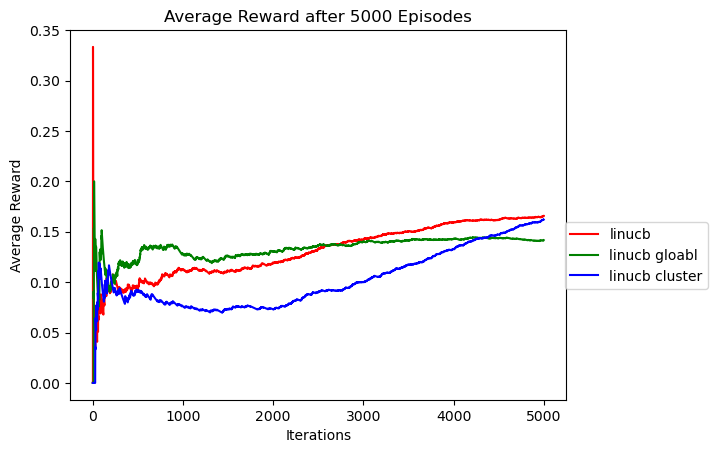

In [7]:
fig, ax = plt.subplots()

transparencia = 0.5

#linucb
plt.plot(linucb_median_rew,label="linucb", color='red')
plt.plot(linucb_g_median_rew,label="linucb gloabl", color='green')
plt.plot(linucb_c_median_rew,label="linucb cluster", color='blue')
#plt.plot(club_median_rew,label="club", color='black')

plt.legend(bbox_to_anchor=(1.3, 0.5))
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.title("Average Reward after " + str(iterations)
    + " Episodes")
#plt.ylim(0,0.1)
plt.show()


In [8]:
max_prob = np.zeros(user_amount)
for i in range(user_amount):
    max_prob[i] = np.max(reward_class.get_probabilities(i))
print(max_prob)
print(np.average(max_prob))

[0.29396122 0.29998899 0.29345302 0.29997707 0.29415908 0.29446677
 0.29993301 0.29998957 0.29999699 0.29999852 0.29412997 0.29395159
 0.29998235 0.29999424 0.29999839 0.29999981 0.29998945 0.29250208
 0.2935607  0.2999992  0.29999809 0.29436335 0.29406321 0.29999068
 0.29999965 0.29999237 0.29999977 0.29999947 0.29984568 0.29491379
 0.29996537 0.29414258 0.29335203 0.29335965 0.29999894 0.29416081
 0.29365403 0.2934585  0.29445911 0.29999998 0.2934089  0.2999997
 0.29997345 0.29464403 0.29999981 0.2999763  0.29424379 0.29994931
 0.29998417 0.29253898 0.29457092 0.29458602 0.29999859 0.29388106
 0.29382895 0.29996418 0.29332883 0.29546914 0.29998051 0.29437144
 0.29384324 0.29406159 0.29442201 0.29999052 0.29351434 0.3
 0.29421762 0.29996547 0.29999999 0.29999973 0.29409184 0.2999837
 0.29998803 0.29998947 0.29332078 0.29999651 0.29997431 0.29428112
 0.29339083 0.29348156 0.29358932 0.29997902 0.2935183  0.29343485
 0.29444    0.29390876 0.29999457 0.29347322 0.29997501 0.29417417
 0.2

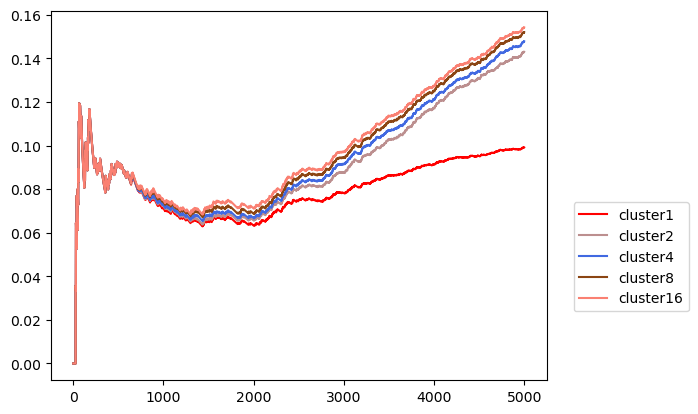

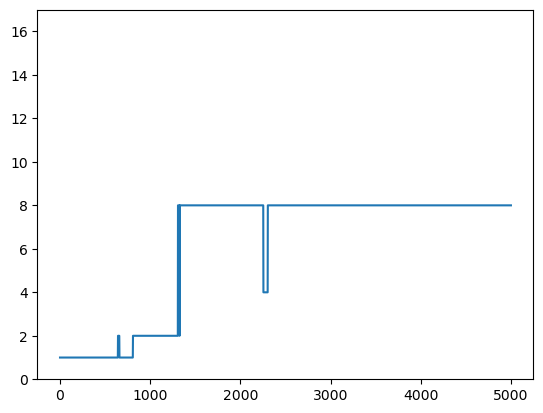

In [9]:
linucbk.get_rc().graph()

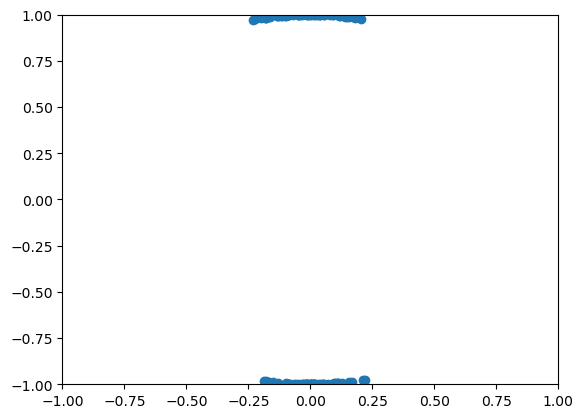

In [10]:
reward_class.graph()

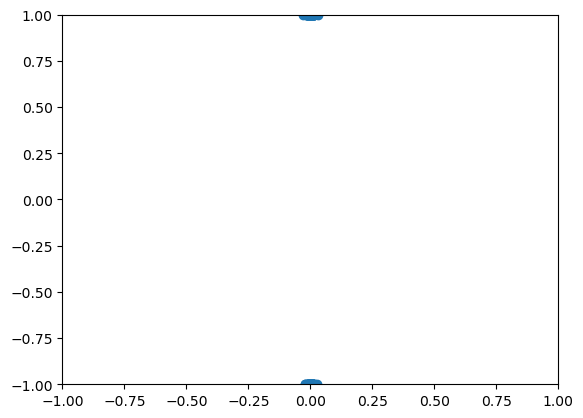

In [11]:
reward_class.graph_best()

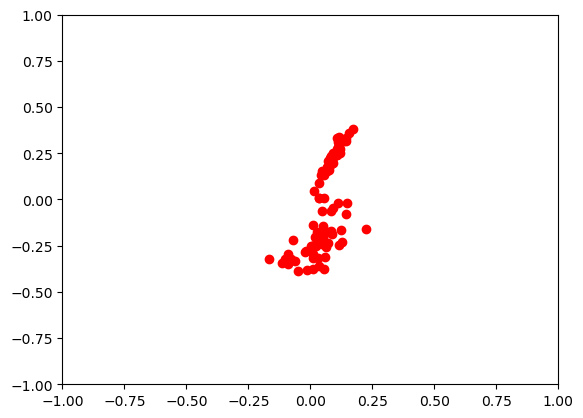

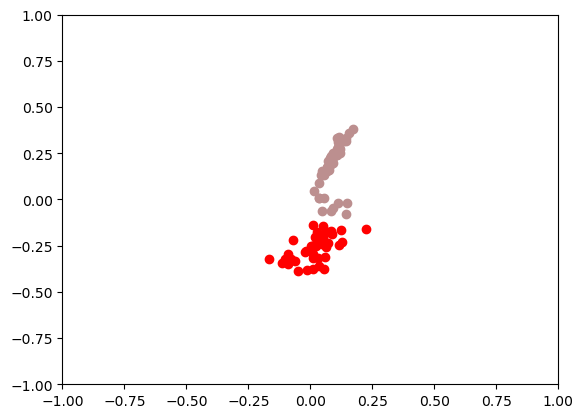

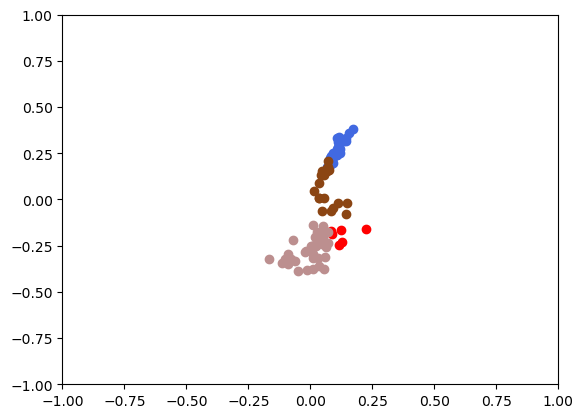

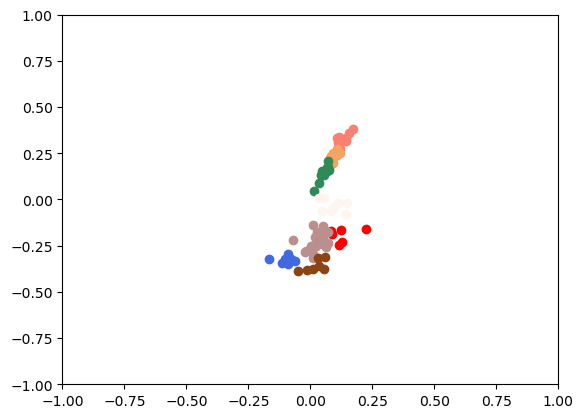

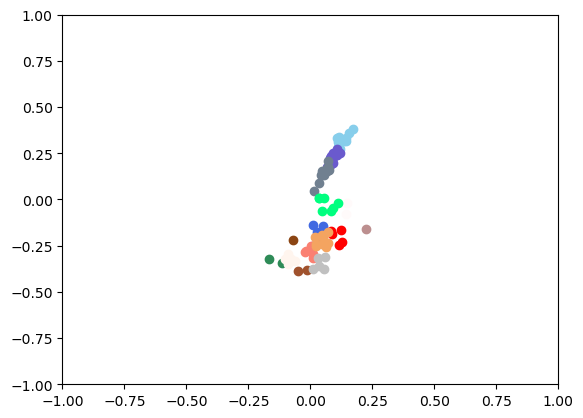

In [12]:
linucbk.get_model().graph()